TASK: KUPUJEMY MIESZKANIE

Zamierzasz kupić mieszkanie. Upatrzone M kosztuje w tym momencie 120 tys. zł, jednak przewidujesz, że przez następne 5 lat ceny mieszkań będą rosły w tempie 5% rocznie. W tym momencie nie dysponujesz wystarczającymi środkami, dlatego znajdujesz ofertę banku, który proponuje lokatę, do której dopłacasz pewna stałą kwotę na koniec każdego miesiąca. Bank oferuje nominalną stopę procentową w wysokości 12% w skali roku, przy kapitalizacji miesięcznej.

1. Ile będzie wynosiła orientacyjna cena mieszkania za 5 lat?
2. Ile musisz wpłacać do banku każdego miesiąca, aby przy przedstawionej ofercie uzbierać na mieszkanie w ciągu 5 lat?
3. Stwórz wykres przedstawiający, jak w interwałach miesięcznych zmieniać się będzie cena mieszkania (liniowy wzrost w całym okresie) oraz wartość twojej lokaty.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import numpy_financial as npf

In [54]:
m_price = 120000 #aktualna cena M w zł
t = 5 #okres czasu w latach
p = 0.05 # roczny procent wzrostu cen M
rate = 0.12 # nominalna stopa procentowa w skali roku w banku
freq = 12 # kapializacja odsetek - 12x w roku

rate /= freq # konwersja stopy procentowej do okresu miesięcznego
cp = t * freq # liczba wszystkich okresów
years = np.arange(0, t + 1, 1) #Lata od 0 do 5

1. Ile będzie wynosiła orientacyjna cena mieszkania za 5 lat?

Orientacyjna cena mieszkania za 5 lat: 153153.79 zł


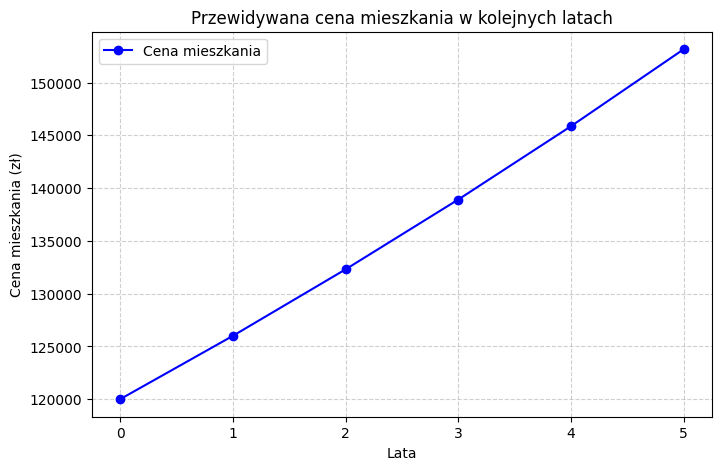

In [ ]:
m_price_future = m_price * np.power((1 + p), years)

print(f"Orientacyjna cena mieszkania za {t} lat: {m_price_future[-1]:.2f} zł")

2. Ile musisz wpłacać do banku każdego miesiąca, aby przy przedstawionej ofercie uzbierać na mieszkanie w ciągu 5 lat?

In [56]:
monthly_installment = (m_price_future[-1] * rate) / (np.power((1 + rate), cp) - 1)

print(f"Miesięczna wpłata potrzebna do uzbierania na mieszkanie: {monthly_installment:.2f} zł")

Miesięczna wpłata potrzebna do uzbierania na mieszkanie: 1875.28 zł


3. Stwórz wykres przedstawiający, jak w interwałach miesięcznych zmieniać się będzie cena mieszkania (liniowy wzrost w całym okresie) oraz wartość twojej lokaty.

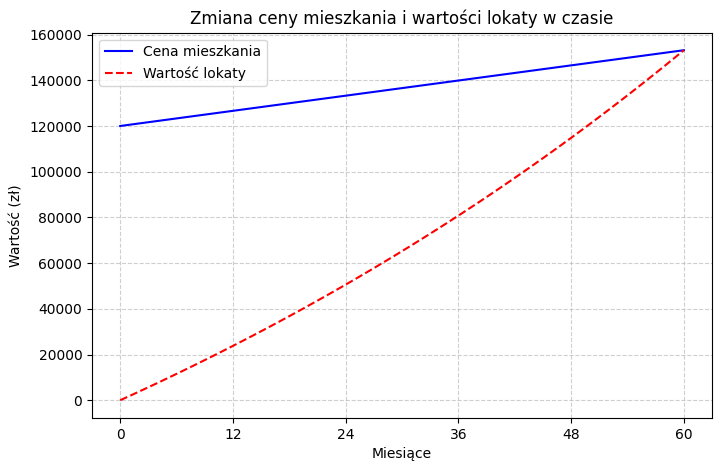

In [57]:
months = np.arange(0, cp + 1, 1)

m_prices_monthly = np.linspace(m_price, m_price_future[-1], cp + 1)

savings_value = monthly_installment * (np.power((1 + rate), months) - 1) / rate

plt.figure(figsize=(8, 5))
plt.plot(months, m_prices_monthly, linestyle='-', color='b', label="Cena mieszkania")
plt.plot(months, savings_value, linestyle='--', color='r', label="Wartość lokaty")

plt.xlabel("Miesiące")
plt.ylabel("Wartość (zł)")
plt.title("Zmiana ceny mieszkania i wartości lokaty w czasie")

plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.xticks(np.arange(0, cp + 1, 12))

plt.show()